# Minireminder

In [1]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# 1. split data
# ...

In [2]:
# when instantiating an Estimator class, you may/must pass some hyperparameters, in this case penalty and C
lr = LogisticRegression(penalty="l1", C=2.0)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
# for example
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, lr.predict(X_test))
# 0.78

In [2]:
# I would then try same estimator with different hyperparam values, to see which one performs better
lr = LogisticRegression(penalty="l1", C=3.0)

# Decision trees

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span><ul class="toc-item"><li><span><a href="#Paréntesis:-build-a-linear-regression" data-toc-modified-id="Paréntesis:-build-a-linear-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Paréntesis: build a linear regression</a></span></li><li><span><a href="#Back-to-trees" data-toc-modified-id="Back-to-trees-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Back to trees</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Train-test-splitting" data-toc-modified-id="Train-test-splitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train test splitting</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Simple-tree-(depth=1)" data-toc-modified-id="Simple-tree-(depth=1)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simple tree (depth=1)</a></span></li><li><span><a href="#Bigger-tree-(depth=3)" data-toc-modified-id="Bigger-tree-(depth=3)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bigger tree (depth=3)</a></span></li><li><span><a href="#Huge-tree-(depth=20)" data-toc-modified-id="Huge-tree-(depth=20)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Huge tree (depth=20)</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Other-hyperparameters" data-toc-modified-id="Other-hyperparameters-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Other hyperparameters</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Intro

A decision tree tries to predict the target variable using a logic like the following.

<img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width=600>

Decision trees:
 * are used **both** for classification (previous example Fit/Unfit) and regression
 * involve stratifying (segmenting) the predictor space...
 * in an iterative manner
 * are given this name because splitting rules can be summarized in a tree

Decision trees:
 * are simple
 * are useful for interpretation
 * are not very powerful predictors but...
 * give rise to more complex models, like Random Forest or Gradient Boosted Trees algorithms

## The problem

Today we will be using a **white wine** dataset

Experts have rated several wines, whose physical properties are also given

In [4]:
df = pd.read_csv("../datasets/wine_quality.csv")

In [5]:
df.shape

(4898, 12)

In [7]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3530,7.2,0.31,0.35,7.20,0.046,45.0,178.0,0.99550,3.14,0.53,9.7,5
2222,8.0,0.45,0.28,10.80,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7
1370,7.6,0.28,0.39,1.90,0.052,23.0,116.0,0.99410,3.25,0.40,10.4,6
1620,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,7
1119,6.4,0.50,0.16,12.90,0.042,26.0,138.0,0.99740,3.28,0.33,9.0,5
3282,6.7,0.12,0.36,2.30,0.039,43.0,125.0,0.99229,3.07,0.67,10.1,7
590,7.1,0.31,0.50,14.50,0.059,6.0,148.0,0.99830,2.94,0.44,9.1,5
1098,6.5,0.29,0.25,10.60,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,6
2489,6.1,0.28,0.24,19.95,0.074,32.0,174.0,0.99922,3.19,0.44,9.3,6
677,5.8,0.32,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7


We want to:
 * build a **supervised** learning model
 * which is a **regression** model (predict quantitative feature)
 * that tries to predict wine `quality` from its physical properties (so that we do not anymore need experts' advice)

### Paréntesis: build a linear regression

1. Compro en la tienda una linear regression.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin = LinearRegression()

In [12]:
# train test split
from sklearn.model_selection import train_test_split

In [57]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
df.shape

(4898, 12)

In [59]:
X = df.drop("quality", axis=1)

In [60]:
y = df.quality

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [62]:
X_train.shape

(3918, 11)

In [63]:
X_test.shape

(980, 11)

2. La entreno con el chorro de 4000 vinos de train. Qué ha cambiado.

In [64]:
lin.fit(X_train, y_train)
# encontrar los parámetros beta_0, ... beta_n

LinearRegression()

In [65]:
pd.Series(lin.coef_, index=X.columns)

fixed acidity             0.065448
volatile acidity         -1.827905
citric acid               0.013577
residual sugar            0.082577
chlorides                -0.423617
free sulfur dioxide       0.002488
total sulfur dioxide     -0.000057
density                -148.352527
pH                        0.702349
sulphates                 0.697834
alcohol                   0.205311
dtype: float64

3. Cojo un vino nuevo. Cómo se predice su quality?  
La prediccion de un vino nuevo será beta_0 + beta_1 * fixed_acidity + beta_2 * volatile... + ...

In [44]:
lin.predict(X_test[:5]).round(2)

array([6.41, 6.69, 5.95, 5.85, 6.16])

In [39]:
y_test[:5]

4660    6
4492    6
4486    6
1864    6
4172    6
Name: quality, dtype: int64

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mean_squared_error(y_train, lin.predict(X_train))

0.5629009263448036

In [42]:
mean_squared_error(y_test, lin.predict(X_test))

0.5669734125775767

Error on test is usually higher

### Back to trees

We will do train test splitting for correct asessment of model performance

We will use MSE metric: $$MSE=\frac{1}{N}\sum(\hat{y} - y)^2$$

In [ ]:
from sklearn.metrics import mean_squared_error

We will:
 * try several models and...
 * keep the one with the **least** MSE on **test set** (also called test error)
 * anyways, we will always show training error too

## Data exploration

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [74]:
df.isna().sum().sum()

0

In [75]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [78]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [79]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

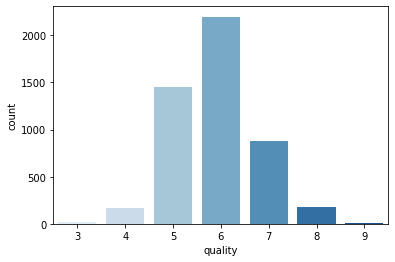

In [80]:
sns.countplot(x=df.quality, palette="Blues")

## Train test splitting

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
target = "quality"

In [87]:
# predictors
X = df.drop(target, axis=1)
# target
y = df[target]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=666)

In [109]:
X.shape

(4898, 11)

In [110]:
X_train.shape

(3918, 11)

In [111]:
X_test.shape

(980, 11)

In [112]:
y_train.shape

(3918,)

In [113]:
y_test.shape

(980,)

## Models

### Baseline model

The baseline model predicts the mean quality for every wine

In [118]:
baseline = y_train.mean()

In [119]:
baseline

5.8894844308320575

MSE can be manually computed

Train error

In [120]:
((y_train - baseline) ** 2).mean()

0.7782406223967026

Test error

In [121]:
((y_test - baseline) ** 2).mean()

0.8086727340637989

Test error is, indeed, as usual, bigger than train error

### Simple tree (depth=1)

Lets first fit a Tree, then interpret it

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
model = DecisionTreeRegressor(max_depth=1)

In [124]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Lets see how this model predicts the first 5 wines

In [125]:
# real values
y_train[:5]

4585    6
4025    6
3185    6
3304    7
506     5
Name: quality, dtype: int64

In [127]:
# predicted values
model.predict(X_train[:5].values).round(2)

array([6.35, 6.35, 6.35, 6.35, 5.61])

Train error

In [129]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.6511398839609709

Test error

In [130]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.685559553685101

In [131]:
from sklearn.tree import plot_tree

In [132]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [134]:
y_train.mean()

5.8894844308320575

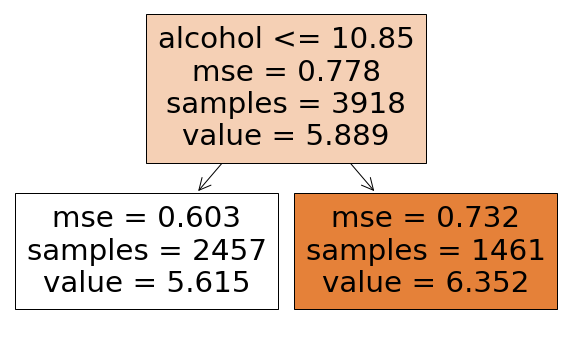

In [133]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [159]:
mean_squared_error(y_train, model.predict(X_train))

0.6511398839609709

In [137]:
model.predict(X_test[5:10].values).round(2)

array([6.35, 5.61, 5.61, 6.35, 5.61])

Some important questions for deep understanding:
 1. while training, why did the DecisionTree choose `alcohol` and $10.85$ ?

In [149]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


I will do the intestines of decision tree for pair (feature, cut) of (residual_sugar, 5)

Imagine we chose `residual_sugar` and value 5

In [150]:
group1 = X_train[X_train.residual_sugar <= 5].copy()
group2 = X_train[X_train.residual_sugar > 5].copy()

In [151]:
group1.shape

(1955, 11)

In [152]:
group2.shape

(1963, 11)

In [153]:
group1_mean = y_train[group1.index].mean()

In [154]:
group1_mean

5.98005115089514

In [155]:
group2_mean = y_train[group2.index].mean()

In [156]:
group2_mean

5.799286805909323

In [157]:
mse = (
    ((y_train[group1.index] - group1_mean) ** 2).sum() +
    ((y_train[group2.index] - group2_mean) ** 2).sum()
) / X_train.shape[0]

In [158]:
mse

0.7700717193499703

Shitty improvement over baseline model, and much worse than alcohol 10.85, optimal feature-threshold pair

2. what is the meaning of `mse`: the mean squared error in the bucket: the one you would get if every wine in that bucket was given the mean of the bucket. This is, a baseline model in the bucket.
3. what is the meaning of `value`: the mean quality of wines in that bucket. The value that will be predicted for every new wine ending in that tree leaf

4. while testing (predicting a new instance), how does the tree operate? It goes through a unique path. When this path ends, the value in that leaf is the prediction

### Bigger tree (depth=3)

In [163]:
model = DecisionTreeRegressor(max_depth=3)

In [164]:
%%time
model.fit(X_train, y_train)

CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 12.5 ms


DecisionTreeRegressor(max_depth=3)

In [165]:
# real values
y_train[:5]

4585    6
4025    6
3185    6
3304    7
506     5
Name: quality, dtype: int64

In [166]:
# predicted values
model.predict(X_train[:5].values).round(2)

array([6.61, 6.61, 6.21, 6.61, 5.03])

Train error

In [167]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.5598058565365571

Test error

In [168]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.5831944046394488

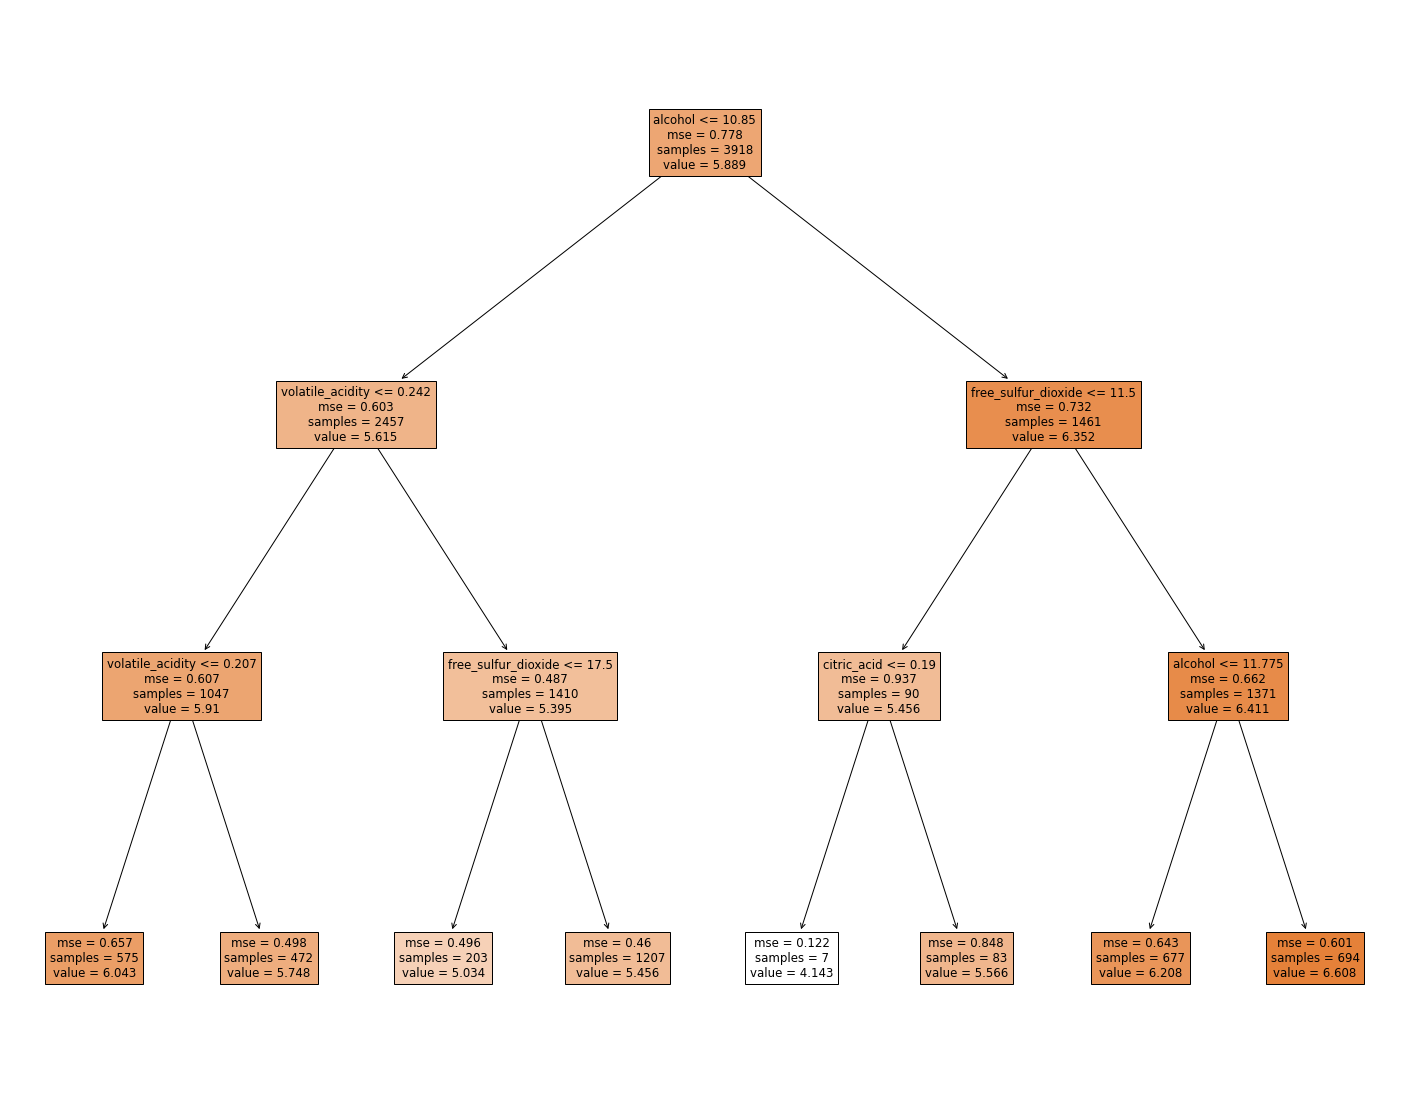

In [169]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [170]:
fig.savefig("depth3.svg")

### Huge tree (depth=20)

In [197]:
model = DecisionTreeRegressor(max_depth=20)

In [198]:
%%time
model.fit(X_train, y_train)

CPU times: user 54.9 ms, sys: 230 µs, total: 55.1 ms
Wall time: 52.7 ms


DecisionTreeRegressor(max_depth=20)

Train error

In [199]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.004910610155920119

Test error

In [200]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.7116155709773315

### Overfitting

Lets see how training and test error changes with `max_depth`

In [204]:
y_train

4585    6
4025    6
3185    6
3304    7
506     5
       ..
1993    6
70      6
2878    6
1950    5
1922    5
Name: quality, Length: 3918, dtype: int64

In [209]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [210]:
results_df = pd.DataFrame(results)

In [211]:
results_df

,depth,train_error,test_error
0,1,0.651140,0.685560
1,2,0.590774,0.615895
2,3,0.559806,0.583194
3,4,0.526841,0.552649
4,5,0.491170,0.550328
5,6,0.452954,0.558617
6,7,0.412669,0.556606
7,8,0.373646,0.565709
8,9,0.328613,0.586637
9,10,0.277674,0.633373


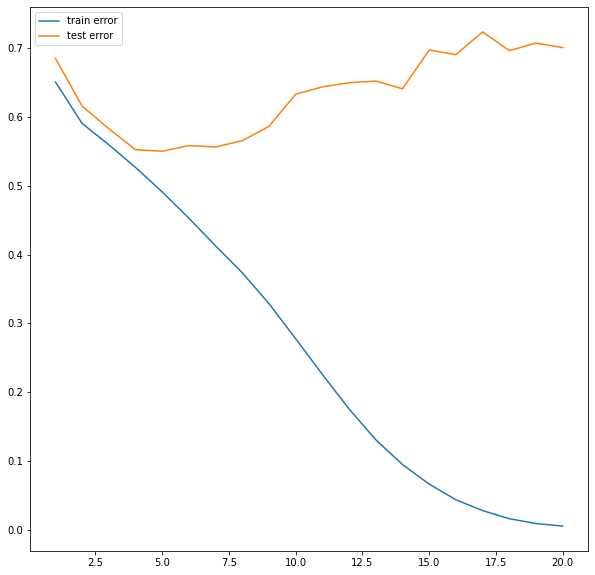

In [212]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

We can see how, when `max_depth` increases above ~6:
 * training error decresases (more precise on training samples)
 * test error increases (model is memorizing training set and not generalizing very well)

This is the famous overfitting! And this is why **test error** is the one you should look at!

### Other hyperparameters

As well as `max_depth`, there are other **hyperparameters** that let us build different trees' architectures of the family DecisionTreeRegressor:
 * `min_samples_split`: the minimum number of samples required to split an internal node  
 * `max_features`: the number of features to consider when looking for the best split  

In [216]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=100, max_features=8, random_state=666)

In [217]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=8, min_samples_split=100,
                      random_state=666)

In [218]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

train error: 0.518119271240688
test error: 0.5777322228752526


### Grid search

Lets find the **best** combination of hyperparameters, i.e. the ones yielding the least test error, among a prescribed grid of values for each hyperparameter

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [5, 6],
        "min_samples_split": [50, 100, 300, 1000],
        "max_features": [7, 11]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

It will try 4 * 2 = 16

In [222]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=5, max_features=7, min_samples_split=50, score=(train=-0.501, test=-0.586), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=5, max_features=7, min_samples_split=50, score=(train=-0.517, test=-0.574), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=5, max_features=7, min_samples_split=50, score=(train=-0.522, test=-0.623), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=5, max_features=7, min_samples_split=50, score=(train=-0.509, test=-0.561), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=50 ...............
[CV]  max_depth=5, max_features=7, min_samples_split=50, score=(train=-0.518, test=-0.554), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, max_features=7, min_samples_split=100, score=(train=-0.526, test=-0.547), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=300 ..............
[CV]  max_depth=5, max_features=7, min_samples_split=300, score=(train=-0.530, test=-0.569), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=300 ..............
[CV]  max_depth=5, max_features=7, min_samples_split=300, score=(train=-0.542, test=-0.565), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=300 ..............
[CV]  max_depth=5, max_features=7, min_samples_split=300, score=(train=-0.529, test=-0.605), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=300 ..............
[CV]  max_depth=5, max_features=7, min_samples_split=300, score=(train=-0.540, test=-0.568), total=   0.0s
[CV] max_depth=5, max_features=7, min_samples_split=300 ..............
[CV]  max_depth=5, max_features=7, min_samples_split=300, score=(train=-0.541, test=-0.570), total=   0.0s
[CV

[CV]  max_depth=6, max_features=11, min_samples_split=50, score=(train=-0.463, test=-0.529), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=6, max_features=11, min_samples_split=50, score=(train=-0.468, test=-0.543), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=6, max_features=11, min_samples_split=50, score=(train=-0.461, test=-0.564), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=6, max_features=11, min_samples_split=50, score=(train=-0.466, test=-0.554), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=50 ..............
[CV]  max_depth=6, max_features=11, min_samples_split=50, score=(train=-0.484, test=-0.554), total=   0.0s
[CV] max_depth=6, max_features=11, min_samples_split=100 .............
[CV]  max_depth=6, max_features=11, min_samples_split=100, score=(train=-0.477, test=-0.533), total=   0.0s
[C

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6], 'max_features': [7, 11],
                         'min_samples_split': [50, 100, 300, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

Lets sort all trees by their performance:

In [223]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [232]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
12,6,11,50,-0.548912,-0.468557
4,5,11,50,-0.552534,-0.497619
13,6,11,100,-0.554162,-0.486066
14,6,11,300,-0.554690,-0.505417
5,5,11,100,-0.555153,-0.508877
6,5,11,300,-0.555459,-0.518684
1,5,7,100,-0.555773,-0.517283
9,6,7,100,-0.559590,-0.487285
8,6,7,50,-0.568243,-0.478749
10,6,7,300,-0.572133,-0.527344


We can access the best estimator of the grid search in this way

In [228]:
best_tree = gs.best_estimator_

In [229]:
best_tree

DecisionTreeRegressor(max_depth=6, max_features=11, min_samples_split=50)

In [233]:
mean_squared_error(best_tree.predict(X_test), y_test)

0.5438827787576582

## Feature importance

How important were features for predicting `quality`? DecisionTreeRegressor has an attribute `feature_importances_`

In [236]:
best_tree

DecisionTreeRegressor(max_depth=6, max_features=11, min_samples_split=50)

In [237]:
feature_imp = pd.Series(best_tree.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)

In [241]:
feature_imp

alcohol                 0.521753
volatile_acidity        0.181691
free_sulfur_dioxide     0.140195
residual_sugar          0.039271
density                 0.034651
fixed_acidity           0.026674
pH                      0.024492
total_sulfur_dioxide    0.016983
citric_acid             0.011027
chlorides               0.003265
sulphates               0.000000
dtype: float64

<AxesSubplot:>

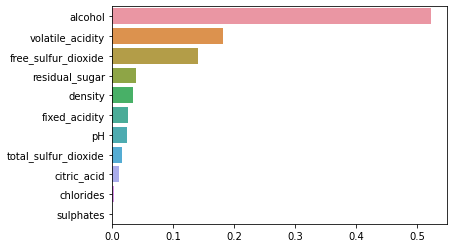

In [239]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)

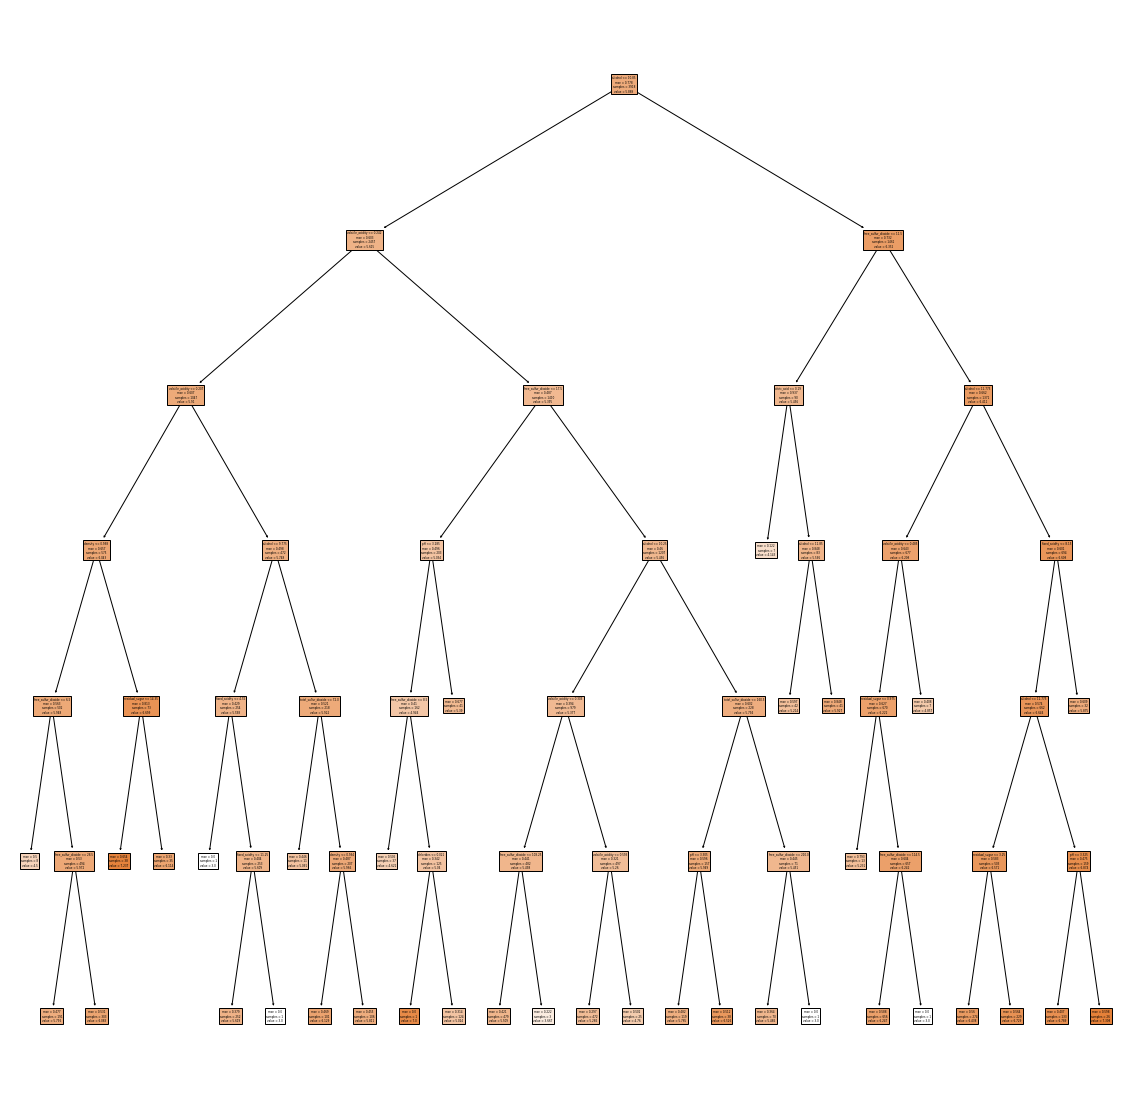

In [242]:
fig = plt.figure(figsize=(20, 20))
plot_tree(best_tree, feature_names=df.columns[:-1], filled=True);

Save in format `.svg` for non-pixeled image!!

In [243]:
fig.savefig("decision_tree.svg", facecolor="white")

## Summary

 * Decision trees are useful for regression (`DecisionTreeRegressor`) and classification (`DecisionTreeClassifier`)
 * Their behavior is quite intuitive
 * Their behavior is interpretable and explainable

 * Decision trees overfit when `max_depth` becomes very big (obvious, individual leaves at the end)
 * Prevent overfitting (always, not only in tree based methods) by looking at test error and train error

 * One decision tree is often not a very powerful ML algorithm
 * Decision trees are the building blocks of more advanced and superpowerful algorithms